In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,ElasticNet
from visualization_utils import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def impute_missing_numerical_values(df, numerical_columns):
    for col in numerical_columns:
        median = df[col].median()
        df[col] = df[col].fillna(median)
    return df

In [3]:
df = pd.read_csv('processed_data/preprocessed_car_data.csv')
# New feature: isElectric
df['isElectric'] = ~df['WLTP_Range_km'].isna() | ~df['Battery_Capacity_kWh'].isna()
# Impute missing values for electric car features with 0
df['WLTP_Range_km'] = df['WLTP_Range_km'].fillna(0)
df['Battery_Capacity_kWh'] = df['Battery_Capacity_kWh'].fillna(0)
# Not used columns
df = df.drop(columns=['Month']) # Not useful for prediction
df = df.drop(columns=['URL']) # Not useful for prediction
df = df.drop(columns=['Area']) # Very correlated with City and City has less missing values
df = df.drop(columns=['Model']) # Too many unique values
df = df.drop(columns=['Status']) # Artificial column created by mobile bg
df = df.drop(columns=['Condition']) # 97% empty
df = impute_missing_numerical_values(df, ['Year', 'Horsepower', 'CubicCapacity', 'KmDriven'])
display(df)

,CarPrice,Year,City,Brand,Horsepower,EngineType,EuroStandard,CubicCapacity,TransmissionType,Category,...,Десен волан,Кожен салон,Линейка,TAXI,Учебен,Хомологация N1,За хора с увреждания,Хладилен,Катафалка,isElectric
0,58000.0,2019.0,София,Audi,286.0,Дизелов,Евро 6,3000.0,Автоматична,Комби,...,False,True,False,False,False,False,False,False,False,False
1,69999.0,2023.0,Габрово,Audi,204.0,Дизелов,Евро 6,2000.0,Автоматична,Седан,...,False,True,False,False,False,False,False,False,False,False
2,56990.0,2020.0,София,Audi,349.0,Дизелов,Евро 6,2000.0,Автоматична,Комби,...,False,True,False,False,False,False,False,False,False,False
3,71999.0,2020.0,Пловдив,Audi,286.0,Дизелов,Евро 6,3000.0,Автоматична,Седан,...,False,True,False,False,False,False,False,False,False,False
4,77000.0,2019.0,Пловдив,Audi,286.0,Дизелов,Евро 6,2000.0,Автоматична,Хечбек,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110694,10500.0,2013.0,Благоевград,Skoda,63.0,Бензинов,Евро 4,1197.0,Ръчна,Седан,...,False,False,False,False,False,False,False,False,False,False
110695,10500.0,2013.0,Плевен,Skoda,105.0,Бензинов,Евро 5,1200.0,Ръчна,Седан,...,False,False,False,False,False,False,False,False,False,False
110696,10000.0,2012.0,Бургас,Skoda,169.0,Дизелов,Other,2000.0,Ръчна,Миниван,...,False,False,False,False,False,False,False,False,False,False
110697,10199.0,2013.0,София,Skoda,86.0,Бензинов,Евро 5,1200.0,Ръчна,Ван,...,False,False,False,False,False,False,False,False,False,False


In [4]:
print("Before onehot encoding",df.shape)
df = pd.get_dummies(df,drop_first=True)
print("After onehot encoding",df.shape)
display(df)

Before onehot encoding (110699, 114)
After onehot encoding (110699, 185)


,CarPrice,Year,Horsepower,CubicCapacity,KmDriven,WLTP_Range_km,Battery_Capacity_kWh,Въздушни възглавници - Странични,Система за изсушаване на накладките,Система за контрол на дистанцията,...,Color_бял,Color_графит,Color_зелен,Color_кафяв,Color_металик,Color_сив,Color_син,Color_сребърен,Color_червен,Color_черен
0,58000.0,2019.0,286.0,3000.0,170000.0,0.0,0.0,True,True,True,...,False,False,False,False,False,False,True,False,False,False
1,69999.0,2023.0,204.0,2000.0,195194.0,0.0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,56990.0,2020.0,349.0,2000.0,152000.0,0.0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,71999.0,2020.0,286.0,3000.0,170500.0,0.0,0.0,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,77000.0,2019.0,286.0,2000.0,134257.0,0.0,0.0,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110694,10500.0,2013.0,63.0,1197.0,160000.0,0.0,0.0,True,False,False,...,True,False,False,False,False,False,False,False,False,False
110695,10500.0,2013.0,105.0,1200.0,175500.0,0.0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
110696,10000.0,2012.0,169.0,2000.0,190000.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110697,10199.0,2013.0,86.0,1200.0,150000.0,0.0,0.0,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [5]:
from sklearn.metrics import r2_score,root_mean_squared_error
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test,train_model=True):
    if train_model:
        model.fit(X_train, y_train)
    results_train = model.predict(X_train)
    results_test = model.predict(X_test)

    train_r2 = r2_score(y_train,results_train)
    test_r2 = r2_score(y_test,results_test)
    train_rmse = root_mean_squared_error(y_train,results_train)
    test_rmse = root_mean_squared_error(y_test,results_test)

    train_score_adj_r2 = 1 - (1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
    test_score_adj_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    print(f"Train Adjusted R2: {round(train_score_adj_r2, 4)}")
    print(f"Train RMSE: {round(train_rmse, 4)}")
    print(f"Test Adjusted R2: {round(test_score_adj_r2, 4)}")
    print(f"Test RMSE: {round(test_rmse, 4)}")

    sns.regplot(x=y_test, y=results_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.grid(True)
    plt.show()
    residuals = y_test-results_test
    sns.histplot(residuals,bins=100)

In [6]:
y=df['CarPrice']
X=df.drop(columns=['CarPrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

Train Adjusted R2: 0.6753
Train RMSE: 23202.134
Test Adjusted R2: 0.6587
Test RMSE: 23869.8942


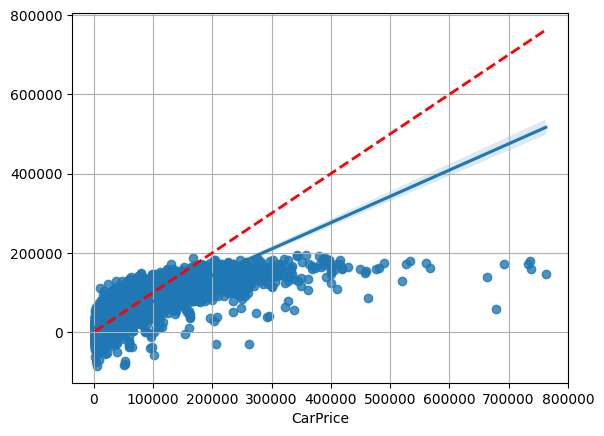

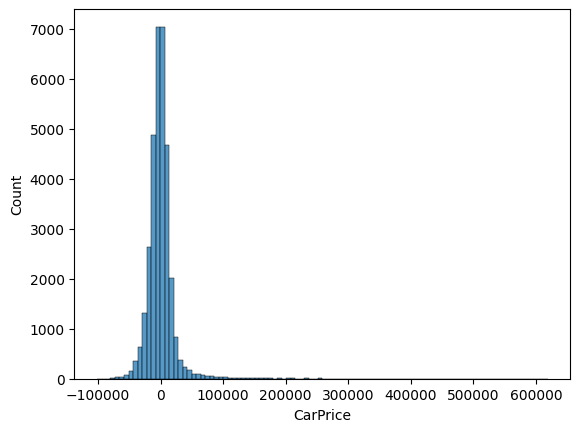

In [8]:
# Baseline
baseline_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
train_and_evaluate_model(baseline_model, X_train, y_train, X_test, y_test)

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
baseline_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet())
])

In [11]:
params = {'regressor__alpha':[0.001,0.01,0.05, 0.1, 0.5 ,1, 2],
          'regressor__l1_ratio':[0.3,0.5,0.7]}
grid_search = GridSearchCV(baseline_model, params, cv=3)
grid_search.fit(X_train,y_train)
print("best params:", grid_search.best_params_)
print("best score:", grid_search.best_score_)

train_and_evaluate_model(grid_search,X_train, y_train, X_test, y_test,train_model=False)

c:\Code\GitHubCode\CarPricePrediction\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.378e+13, tolerance: 8.730e+09
  model = cd_fast.enet_coordinate_descent(
c:\Code\GitHubCode\CarPricePrediction\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.423e+13, tolerance: 8.645e+09
  model = cd_fast.enet_coordinate_descent(
c:\Code\GitHubCode\CarPricePrediction\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

KeyboardInterrupt: 

In [ ]:
#Adding Polynomial features and interaction terms
X_train['Horsepower^2'] = X_train['Horsepower']**2
X_train['Horsepower^3'] = X_train['Horsepower']**3
X_train['YearsSince1980^2'] = (X_train['Year']-1980)**2
X_train['YearsSince1980^3'] = (X_train['Year']-1980)**3
X_train['(ThousandKmDriven)^2'] = (X_train['KmDriven']/1000)**2
X_train['(ThousandKmDriven)^3'] = (X_train['KmDriven']/1000)**3
#Interaction terms
X_train['Horsepower*YearsSince1980'] = X_train['Horsepower']*(X_train['Year']-1980)
X_train['Horsepower*ThousandKmDriven'] = X_train['Horsepower']*(X_train['KmDriven']/1000)
X_train['YearsSince1980*ThousandKmDriven'] = (X_train['Year']-1980)*(X_train['KmDriven']/1000)

X_test['Horsepower^2'] = X_test['Horsepower']**2
X_test['Horsepower^3'] = X_test['Horsepower']**3
X_test['YearsSince1980^2'] = (X_test['Year']-1980)**2
X_test['YearsSince1980^3'] = (X_test['Year']-1980)**3
X_test['(ThousandKmDriven)^2'] = (X_test['KmDriven']/1000)**2
X_test['(ThousandKmDriven)^3'] = (X_test['KmDriven']/1000)**3
#Interaction terms
X_test['Horsepower*YearsSince1980'] = X_test['Horsepower']*(X_test['Year']-1980)
X_test['Horsepower*ThousandKmDriven'] = X_test['Horsepower']*(X_test['KmDriven']/1000)
X_test['YearsSince1980*ThousandKmDriven'] = (X_test['Year']-1980)*(X_test['KmDriven']/1000)

In [ ]:
display(X_train)

,Year,Horsepower,CubicCapacity,KmDriven,WLTP_Range_km,Battery_Capacity_kWh,Въздушни възглавници - Странични,Система за изсушаване на накладките,Система за контрол на дистанцията,Контрол на налягането на гумите,...,Color_кафяв,Color_металик,Color_сив,Color_син,Color_сребърен,Color_червен,Color_черен,Horsepower^2,YearsSince1980^2,(ThousandKmDriven)^2
15687,2016.0,75.0,1500.0,132123.0,0.0,0.0,True,False,False,False,...,False,False,False,True,False,False,False,5625.0,1296.0,17456.487129
35549,2007.0,75.0,2000.0,172000.0,0.0,0.0,True,False,False,False,...,False,False,False,False,False,False,True,5625.0,729.0,29584.000000
47557,2015.0,258.0,3000.0,290000.0,0.0,0.0,True,True,False,True,...,True,False,False,False,False,False,False,66564.0,1225.0,84100.000000
84721,2020.0,202.0,2199.0,84087.0,0.0,0.0,True,False,True,True,...,False,False,False,False,False,False,True,40804.0,1600.0,7070.623569
83599,2020.0,462.0,2000.0,48000.0,0.0,0.0,False,False,False,False,...,False,False,True,False,False,False,False,213444.0,1600.0,2304.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,2004.0,90.0,1600.0,19600.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,True,False,8100.0,576.0,384.160000
110268,2011.0,125.0,1700.0,205000.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,15625.0,961.0,42025.000000
103694,2011.0,120.0,1600.0,168389.0,0.0,0.0,True,False,False,False,...,False,False,False,False,False,False,True,14400.0,961.0,28354.855321
860,2020.0,500.0,4000.0,170200.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,250000.0,1600.0,28968.040000


c:\Code\GitHubCode\CarPricePrediction\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.725e+12, tolerance: 8.730e+09
  model = cd_fast.enet_coordinate_descent(
c:\Code\GitHubCode\CarPricePrediction\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.410e+12, tolerance: 8.645e+09
  model = cd_fast.enet_coordinate_descent(
c:\Code\GitHubCode\CarPricePrediction\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

best params: {'regressor__alpha': 0.01}
best score: 0.7291990461183419
Train Adjusted R2: 0.7307
Train RMSE: 21128.0251
Test Adjusted R2: 0.7125
Test RMSE: 21908.3949


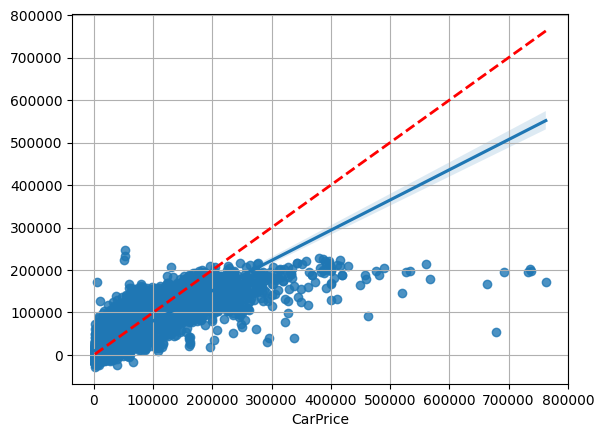

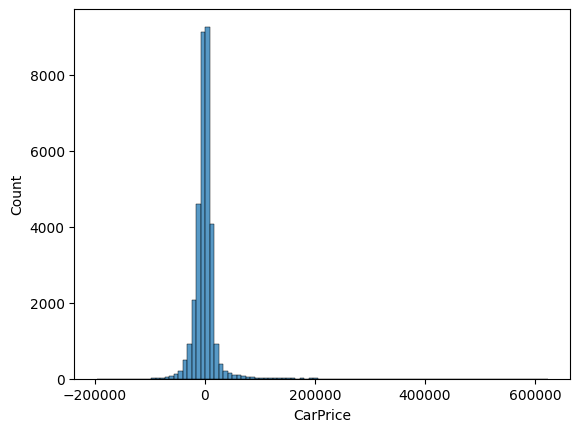

In [ ]:
params = {'regressor__alpha':[0.001,0.01,0.05, 0.1, 0.5 ,1, 2],
          'regressor__l1_ratio':[0.3,0.5,0.7]}
grid_search_with_polynomial = GridSearchCV(baseline_model, params, cv=3)
grid_search_with_polynomial.fit(X_train,y_train)
print("best params:",grid_search_with_polynomial.best_params_)
print("best score:",grid_search_with_polynomial.best_score_)

train_and_evaluate_model(grid_search_with_polynomial,X_train, y_train, X_test, y_test,train_model=False)